In [1]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

import numpy as np
import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 14)

import xgboost as xgb
import sklearn

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder

from xgboost import XGBClassifier

In [2]:
train_main = pd.read_csv('train.csv')
test_main = pd.read_csv('test.csv')

# train drop
y = train_main['class']
train = train_main.drop(['id', 'class'], axis = 1)
#test drop
test = test_main.drop(['id'], axis = 1)

train.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27
0,21.754551,-9.061572,-6.260555,17.105104,-7.931253,18.665724,-20.574977,4.522313,-9.428453,-3.441898,0.063335,-12.128157,16.915358,-9.035745,7.786735,9.800922,-9.251956,15.176581,-18.379107,-9.908876,A,E,C,A,D,D,A
1,16.133239,-9.142534,-3.725612,17.414642,-7.843465,18.627253,-18.113234,0.756394,-1.713193,-4.080438,-0.039289,-18.243687,13.866427,-20.440775,16.021572,9.748852,-9.281247,15.068331,-5.934112,-8.621282,A,G,C,C,D,D,A
2,17.470780,-9.204687,-3.358596,17.203143,-7.927872,18.614991,-18.271812,0.260272,-1.711970,-4.214618,0.080986,-18.944783,14.500104,-20.450951,16.072552,9.784429,-9.290584,15.045586,15.246502,-8.754558,C,A,C,B,C,E,G
3,22.381915,-11.275073,-4.088679,17.198187,-7.903931,18.576920,-17.877085,1.246497,-8.933194,-4.442753,0.399733,-13.099715,16.949349,-10.314795,6.683148,9.785263,-9.319574,15.006916,19.514075,-7.496780,D,A,B,B,C,A,G
4,21.839868,-11.752235,-2.225605,17.663014,-7.439467,18.692687,-18.367903,-1.623479,-8.734139,-3.365932,-0.041798,-12.869065,17.059030,-10.724578,7.180757,9.707077,-9.231428,15.189461,-6.686045,-11.154692,B,F,C,B,A,D,D


In [3]:
enc = LabelEncoder()
train['f21'] = enc.fit_transform(train['f21'])
train['f22'] = enc.fit_transform(train['f22'])
train['f23'] = enc.fit_transform(train['f23'])
train['f24'] = enc.fit_transform(train['f24'])
train['f25'] = enc.fit_transform(train['f25'])
train['f26'] = enc.fit_transform(train['f26'])
train['f27'] = enc.fit_transform(train['f27'])

test['f21'] = enc.fit_transform(test['f21'])
test['f22'] = enc.fit_transform(test['f22'])
test['f23'] = enc.fit_transform(test['f23'])
test['f24'] = enc.fit_transform(test['f24'])
test['f25'] = enc.fit_transform(test['f25'])
test['f26'] = enc.fit_transform(test['f26'])
test['f27'] = enc.fit_transform(test['f27'])

train.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27
0,21.754551,-9.061572,-6.260555,17.105104,-7.931253,18.665724,-20.574977,4.522313,-9.428453,-3.441898,0.063335,-12.128157,16.915358,-9.035745,7.786735,9.800922,-9.251956,15.176581,-18.379107,-9.908876,0,4,2,0,3,3,0
1,16.133239,-9.142534,-3.725612,17.414642,-7.843465,18.627253,-18.113234,0.756394,-1.713193,-4.080438,-0.039289,-18.243687,13.866427,-20.440775,16.021572,9.748852,-9.281247,15.068331,-5.934112,-8.621282,0,6,2,2,3,3,0
2,17.470780,-9.204687,-3.358596,17.203143,-7.927872,18.614991,-18.271812,0.260272,-1.711970,-4.214618,0.080986,-18.944783,14.500104,-20.450951,16.072552,9.784429,-9.290584,15.045586,15.246502,-8.754558,2,0,2,1,2,4,6
3,22.381915,-11.275073,-4.088679,17.198187,-7.903931,18.576920,-17.877085,1.246497,-8.933194,-4.442753,0.399733,-13.099715,16.949349,-10.314795,6.683148,9.785263,-9.319574,15.006916,19.514075,-7.496780,3,0,1,1,2,0,6
4,21.839868,-11.752235,-2.225605,17.663014,-7.439467,18.692687,-18.367903,-1.623479,-8.734139,-3.365932,-0.041798,-12.869065,17.059030,-10.724578,7.180757,9.707077,-9.231428,15.189461,-6.686045,-11.154692,1,5,2,1,0,3,3


In [4]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2, random_state=42)

print(np.shape(X_train), np.shape(y_test))

(2654, 27) (664,)


## Corr


In [134]:
corr_matrix = train.corr()

In [56]:
a = abs(corr_matrix['class'])

for num in range(len(a)):
    if a[num] > 0.1:
        print(num)

3
4
10
15
20
22
25
27


In [76]:
corr_train = pd.DataFrame(train, columns = ['f4', 'f5', 'f11', 'f16', 'f21', 'f23', 'f26'])

print(corr_train.shape)
corr_train.head()

(3318, 7)


,f4,f5,f11,f16,f21,f23,f26
0,17.105104,-7.931253,0.063335,9.800922,0,2,3
1,17.414642,-7.843465,-0.039289,9.748852,0,2,3
2,17.203143,-7.927872,0.080986,9.784429,2,2,4
3,17.198187,-7.903931,0.399733,9.785263,3,1,0
4,17.663014,-7.439467,-0.041798,9.707077,1,2,3


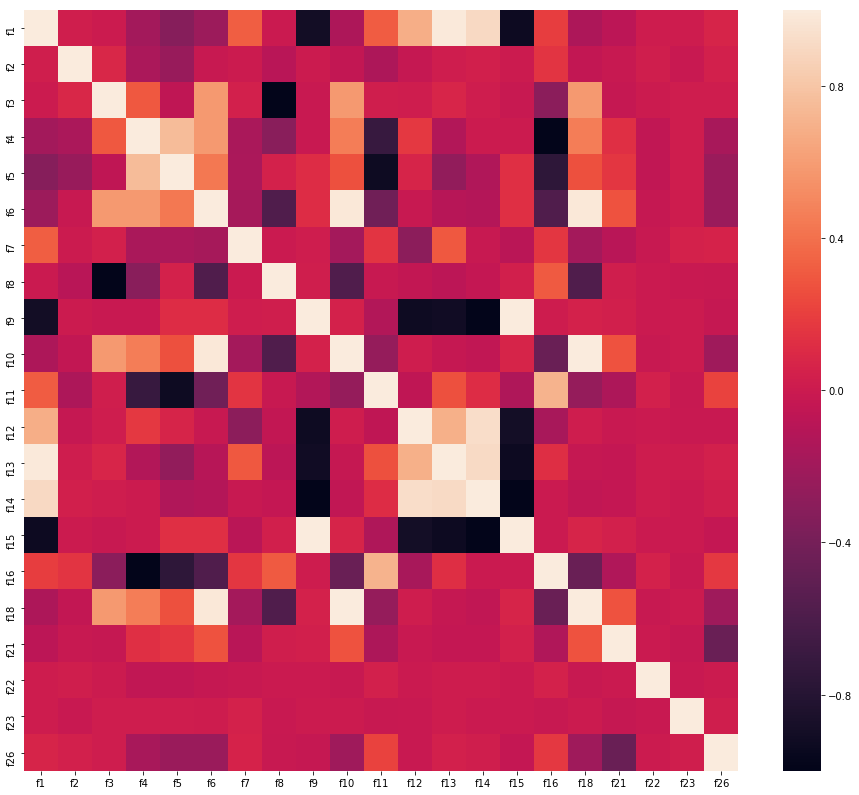

In [136]:
sns.heatmap(corr_matrix);

## Sklearn feat select


#### VarianceThreshold

In [68]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(.5 * (1 - .5)))
X_new = sel.fit_transform(train)

In [69]:
X_new.shape

(3318, 20)

#### SelectKBest

In [7]:
from sklearn.feature_selection import SelectPercentile, f_classif, chi2, SelectKBest, mutual_info_classif

X_new = SelectKBest(f_classif, k=23).fit_transform(train, y)
X_new.shape

(3318, 23)

#### Select from forest

In [82]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [89]:
clf = ExtraTreesClassifier(n_estimators=150)
clf = clf.fit(train, y)
clf.feature_importances_

array([0.02354962, 0.03669586, 0.03478304, 0.04730181, 0.1017778 ,
       0.04124878, 0.0304854 , 0.03423333, 0.02344416, 0.04589633,
       0.0720404 , 0.02207121, 0.02175558, 0.02235739, 0.03085992,
       0.04620494, 0.03571688, 0.04691303, 0.02052275, 0.02137605,
       0.1106016 , 0.01908917, 0.02146209, 0.01899255, 0.02067306,
       0.03157141, 0.01837583])

In [91]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(train)
X_new.shape           

(3318, 8)

#### TrTe split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

print(np.shape(X_train), np.shape(y_test))

(2654, 23) (664,)


# MAKE classifires

### XGB

In [10]:
best_params = {
    'eval_metric': 'mlogloss', 
    'learning_rate': 0.01, 
    'max_depth': 13, 
    'n_estimators': 1500, 
    'subsample': 0.8, 
    'random_state': 42
}

In [11]:
xgb_model = XGBClassifier(**best_params).fit(X_train, y_train)

print(xgb_model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='mlogloss', gamma=0,
       learning_rate=0.01, max_delta_step=0, max_depth=13,
       min_child_weight=1, missing=None, n_estimators=1500, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)


In [12]:
predicted_labels = xgb_model.predict(X_test)

/home/r/.conda/envs/mainpy/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [13]:
from sklearn.metrics import accuracy_score

print("Accuracy on the test set is: {}".format(
    round(accuracy_score(y_test, predicted_labels), 5)))

Accuracy on the test set is: 0.78614


## CV

In [272]:
grad_params = {'n_estimators': range(700, 1501, 100),
               'learning_rate': np.logspace(-3, 1, 5),
               'subsample': list(np.arange(0.4, 1, 0.1)),
              'max_depth': range(5, 16, 1),
             }


grad_grid = GridSearchCV(xgb_model, grad_params,
                         cv=3, n_jobs=-1,
                         verbose=True)

grad_grid.fit(X_train, y_train)

Fitting 3 folds for each of 2970 candidates, totalling 8910 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 48.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 98.6min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 169.2min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 265.8min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 340.8min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 446.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 539.7min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 606.8min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed: 653.3min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed: 687.2min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed: 707.1min
[Parallel(n_jobs=-1)]: Done 8910 out of 8910 | elapsed: 714.7min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='mlogloss', gamma=0,
       learning_rate=0.046415888336127774, max_delta_step=0, max_depth=13,
       min_child_weight=1, missing=None, n_estimators=900, n_jobs=1,
       nthread=None, objective='multi:softprob', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.7),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': range(700, 1501, 100), 'learning_rate': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]), 'subsample': [0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999], 'max_depth': range(5, 16)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [273]:
#Лучшее сочетание параметров и соответствующая средняя доля правильных ответов на кросс-валидации:
print('Лучшие параметры: {}\nРезультат на них: {}'.format(grad_grid.best_params_, grad_grid.best_score_))


print(accuracy_score(y_test, grad_grid.predict(X_test)))

Лучшие параметры: {'learning_rate': 0.01, 'max_depth': 13, 'n_estimators': 1500, 'subsample': 0.7999999999999999}
Результат на них: 0.7748643761301989
nan


In [274]:
f = open('BEST params.txt', 'w')
f.write(str(grad_grid.best_params_))
f.close()

## RF

In [40]:
params = {
    'n_estimators': 1500,
    'max_depth': None,
    'max_leaf_nodes': None,
    'random_state': 42,
    'n_jobs': -1
}

In [41]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(**params).fit(X_train, y_train)

print(rf_model)

predicted_labels = rf_model.predict(X_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)


In [42]:
print("Accuracy on the test set is: {}".format(
    round(accuracy_score(y_test, predicted_labels), 5)))

Accuracy on the test set is: 0.74849


### Save results

In [287]:
a = np.arange(1, 6634, 2)
predictios = xgb_model.predict(np.asarray(test.drop(['f8', 'f27', 'f20', 'f22'], axis = 1)))

In [288]:
predictios

array(['E', 'G', 'F', ..., 'A', 'A', 'B'], dtype=object)

In [289]:
d = {'id': a, 'class': predictios}

df = pd.DataFrame(d, columns = None)
df.head()

,id,class
0,1,E
1,3,G
2,5,F
3,7,G
4,9,G


In [290]:
df.to_csv('MYsample.csv', index = False)